<a href="https://colab.research.google.com/github/cesar-90-md/data_clean_filter/blob/main/Entrega_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **COBERTURA MOVIL EN LOS MUNICIPIOS DE COLOMBIA: **

Analisis de las barreras geográficas y de infraestructura que crean una profunda brecha digital entre el campo y la ciudad.



In [45]:
import seaborn as sns # tiene graficos con enfasis en estadistica
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # graficos de uso general

df_movile_red = pd.read_csv('/content/Cobertura_móvil_por_tecnología,_departamento_y_municipio_por_proveedor_20251004.csv')

## **EXPLORACION INICIAL**


In [46]:
df_movile_red.shape

(407281, 16)

In [47]:
df_movile_red.sample(20)

,AÑO,TRIMESTRE,PROVEEDOR,COD DEPARTAMENTO,DEPARTAMENTO,COD MUNICIPIO,MUNICIPIO,CABECERA MUNICIPAL,COD CENTRO POBLADO,CENTRO POBLADO,COBERTURA 2G,COBERTURA 3G,"COBERTURA HSPA+, HSPA+DC",COBERTUTA 4G,COBERTURA LTE,COBERTURA 5G
208869,2018,3,COMUNICACION CELULAR S A COMCEL S A,18,CAQUETA,18785.0,SOLITA,N,0.0,PUERTO BOLIVIA,N,N,N,N,N,N
149151,2018,2,COMUNICACION CELULAR S A COMCEL S A,13,BOLÍVAR,13442.0,MARÍA LA BAJA,N,13442006.0,RETIRO NUEVO,S,S,N,N,N,N
376346,2015,4,COLOMBIA TELECOMUNICACIONES S.A. E.S.P.,47,MAGDALENA,47980.0,ZONA BANANERA,N,47980006.0,RIOFRÍO,S,S,N,N,N,N
205219,2016,2,COLOMBIA MOVIL S.A ESP,66,RISARALDA,66045.0,APÍA,S,66045001.0,APÍA,S,S,S,N,N,N
407227,2016,4,COLOMBIA TELECOMUNICACIONES S.A. E.S.P.,41,HUILA,41770.0,SUAZA,N,41770002.0,GUAYABAL,N,S,N,N,N,N
109858,2022,4,COLOMBIA TELECOMUNICACIONES S.A. E.S.P.,20,CESAR,20175.0,CHIMICHAGUA,N,20175016.0,LA MATA,N,S,S,N,N,N
274134,2015,4,COLOMBIA TELECOMUNICACIONES S.A. E.S.P.,63,QUINDÍO,63594.0,QUIMBAYA,N,63594002.0,EL LAUREL,S,N,N,N,N,N
340361,2016,4,COLOMBIA TELECOMUNICACIONES S.A. E.S.P.,15,BOYACÁ,15572.0,PUERTO BOYACÁ,N,15572009.0,KILÓMETRO DOS Y MEDIO,S,N,N,N,N,N
209674,2016,3,COLOMBIA MOVIL S.A ESP,41,HUILA,41306.0,GIGANTE,S,41306001.0,GIGANTE,S,S,S,N,N,N
191932,2016,3,COMUNICACION CELULAR S A COMCEL S A,95,GUAVIARE,95200.0,MIRAFLORES,N,95200010.0,PUERTO SANTANDER,N,N,N,N,N,N


In [48]:
df_movile_red.columns

Index(['AÑO', 'TRIMESTRE', 'PROVEEDOR', 'COD DEPARTAMENTO', 'DEPARTAMENTO',
       'COD MUNICIPIO', 'MUNICIPIO', 'CABECERA MUNICIPAL',
       'COD CENTRO POBLADO', 'CENTRO POBLADO', 'COBERTURA 2G', 'COBERTURA 3G',
       'COBERTURA HSPA+, HSPA+DC', 'COBERTUTA 4G', 'COBERTURA LTE',
       'COBERTURA 5G'],
      dtype='object')

In [49]:
df_movile_red.describe()

,AÑO,TRIMESTRE,COD DEPARTAMENTO,COD MUNICIPIO,COD CENTRO POBLADO
count,407281.000000,407281.000000,407281.000000,407230.000000,4.072660e+05
mean,2019.087880,2.502798,39.142754,39548.582182,3.401460e+07
std,2.305594,1.121758,25.736460,25713.643191,2.752303e+07
min,2015.000000,1.000000,5.000000,5001.000000,0.000000e+00
25%,2017.000000,1.000000,18.000000,18150.000000,1.314000e+07
50%,2019.000000,3.000000,27.000000,27205.000000,2.517500e+07
75%,2021.000000,4.000000,66.000000,66456.000000,5.440500e+07
max,2023.000000,4.000000,99.000000,99773.000000,9.977303e+07


In [50]:
pd.unique(df_movile_red['DEPARTAMENTO'])

array(['CHOCÓ', 'ANTIOQUIA', 'SUCRE', 'TOLIMA', 'META', 'CESAR', 'ARAUCA',
       'LA GUAJIRA', 'BOYACÁ', 'CUNDINAMARCA', 'CAQUETA', 'NARIÑO',
       'RISARALDA', 'NORTE DE SANTANDER', 'BOLÍVAR', 'CAUCA', 'CASANARE',
       'MAGDALENA', 'VALLE DEL CAUCA', 'HUILA', 'CÓRDOBA', 'CALDAS',
       'QUINDÍO', 'GUAVIARE', 'BOGOTÁ D.C.', 'VICHADA', 'ATLÁNTICO',
       'SANTANDER',
       'ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA',
       'VAUPÉS', 'PUTUMAYO', 'AMAZONAS', 'GUAINÍA'], dtype=object)

In [51]:
df_movile_red.nunique()

,0
AÑO,9
TRIMESTRE,4
PROVEEDOR,8
COD DEPARTAMENTO,33
DEPARTAMENTO,33
COD MUNICIPIO,1121
MUNICIPIO,1037
CABECERA MUNICIPAL,2
COD CENTRO POBLADO,8298
CENTRO POBLADO,7089


## **FILTROS**

In [52]:
df_movile_red['COBERTURA 5G'].unique() # Entre el perioro del 2018 al 2023, colombia no tiene cobertura 5G

array(['N'], dtype=object)

In [53]:
df_movile_red['PROVEEDOR'].nunique()

8

In [54]:
df_movile_red[df_movile_red['PROVEEDOR'] == 'COMUNICACION CELULAR S A COMCEL S A']

,AÑO,TRIMESTRE,PROVEEDOR,COD DEPARTAMENTO,DEPARTAMENTO,COD MUNICIPIO,MUNICIPIO,CABECERA MUNICIPAL,COD CENTRO POBLADO,CENTRO POBLADO,COBERTURA 2G,COBERTURA 3G,"COBERTURA HSPA+, HSPA+DC",COBERTUTA 4G,COBERTURA LTE,COBERTURA 5G
4,2021,2,COMUNICACION CELULAR S A COMCEL S A,50,META,50150.0,CASTILLA LA NUEVA,N,50150001.0,SAN LORENZO,S,S,S,S,N,N
5,2022,3,COMUNICACION CELULAR S A COMCEL S A,5,ANTIOQUIA,5264.0,ENTRERRIOS,S,5264000.0,ENTRERRÍOS,S,S,S,S,N,N
7,2022,1,COMUNICACION CELULAR S A COMCEL S A,81,ARAUCA,81065.0,ARAUQUITA,N,81065007.0,REINERA (GAVIOTA),S,S,S,N,N,N
10,2021,1,COMUNICACION CELULAR S A COMCEL S A,70,SUCRE,70001.0,SINCELEJO,N,70001020.0,POLICARPA,S,S,S,N,N,N
11,2021,1,COMUNICACION CELULAR S A COMCEL S A,20,CESAR,20001.0,VALLEDUPAR,N,0.0,VERACRUZ,N,N,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407272,2020,2,COMUNICACION CELULAR S A COMCEL S A,5,ANTIOQUIA,5145.0,CARAMANTA,S,5145001.0,CARAMANTA,S,S,S,N,S,N
407274,2016,3,COMUNICACION CELULAR S A COMCEL S A,5,ANTIOQUIA,5665.0,SAN PEDRO DE URABA,N,0.0,RALITO,N,N,N,N,N,N
407276,2016,2,COMUNICACION CELULAR S A COMCEL S A,19,CAUCA,19001.0,POPAYÁN,N,0.0,EL SENDERO,N,N,N,N,N,N
407277,2017,1,COMUNICACION CELULAR S A COMCEL S A,52,NARIÑO,52001.0,PASTO,N,0.0,BUESAQUILLO ALTO,N,N,N,N,N,N


In [55]:
sorted(df_movile_red['PROVEEDOR'].unique(), reverse=True)

['UNE EPM TELECOMUNICACIONES S.A.',
 'PARTNERS TELECOM COLOMBIA SAS',
 'EMPRESA DE TELECOMUNICACIONES DE BOGOTA S.A. ESP',
 'COMUNICACION CELULAR S A COMCEL S A',
 'COLOMBIA TELECOMUNICACIONES S.A. E.S.P.',
 'COLOMBIA MOVIL  S.A ESP',
 'AVANTEL S.A.S',
 'ALMACENES EXITO INVERSIONES S.A.S.']

In [56]:
nombres_columnas = list(df_movile_red.columns)
for i in nombres_columnas:
  print(f"La columna {i} tiene: {df_movile_red[i].nunique()} valores unicos") #(NUNIQUE= ME CUENTA)

La columna AÑO tiene: 9 valores unicos
La columna TRIMESTRE tiene: 4 valores unicos
La columna PROVEEDOR tiene: 8 valores unicos
La columna COD DEPARTAMENTO tiene: 33 valores unicos
La columna DEPARTAMENTO tiene: 33 valores unicos
La columna COD MUNICIPIO tiene: 1121 valores unicos
La columna MUNICIPIO tiene: 1037 valores unicos
La columna CABECERA MUNICIPAL tiene: 2 valores unicos
La columna COD CENTRO POBLADO tiene: 8298 valores unicos
La columna CENTRO POBLADO tiene: 7089 valores unicos
La columna COBERTURA 2G tiene: 2 valores unicos
La columna COBERTURA 3G tiene: 2 valores unicos
La columna COBERTURA HSPA+, HSPA+DC tiene: 2 valores unicos
La columna COBERTUTA 4G tiene: 2 valores unicos
La columna COBERTURA LTE tiene: 2 valores unicos
La columna COBERTURA 5G tiene: 1 valores unicos


In [57]:
list(sorted(df_movile_red['MUNICIPIO'].unique()))

['ABEJORRAL',
 'ABREGO',
 'ABRIAQUÍ',
 'ACACÍAS',
 'ACANDÍ',
 'ACEVEDO',
 'ACHÍ',
 'AGRADO',
 'AGUA DE DIOS',
 'AGUACHICA',
 'AGUADA',
 'AGUADAS',
 'AGUAZUL',
 'AGUSTÍN CODAZZI',
 'AIPE',
 'ALBANIA',
 'ALBÁN',
 'ALCALÁ',
 'ALDANA',
 'ALEJANDRÍA',
 'ALGARROBO',
 'ALGECIRAS',
 'ALMAGUER',
 'ALMEIDA',
 'ALPUJARRA',
 'ALTAMIRA',
 'ALTO BAUDÓ',
 'ALTOS DEL ROSARIO',
 'ALVARADO',
 'AMAGÁ',
 'AMALFI',
 'AMBALEMA',
 'ANAPOIMA',
 'ANCUYA',
 'ANDALUCÍA',
 'ANDES',
 'ANGELÓPOLIS',
 'ANGOSTURA',
 'ANOLAIMA',
 'ANORÍ',
 'ANSERMA',
 'ANSERMANUEVO',
 'ANZA',
 'ANZOÁTEGUI',
 'APARTADÓ',
 'APULO',
 'APÍA',
 'AQUITANIA',
 'ARACATACA',
 'ARANZAZU',
 'ARATOCA',
 'ARAUCA',
 'ARAUQUITA',
 'ARBELÁEZ',
 'ARBOLEDA',
 'ARBOLEDAS',
 'ARBOLETES',
 'ARCABUCO',
 'ARENAL',
 'ARGELIA',
 'ARIGUANÍ',
 'ARJONA',
 'ARMENIA',
 'ARMERO',
 'ARROYOHONDO',
 'ASTREA',
 'ATACO',
 'ATRATO',
 'AYAPEL',
 'BAGADÓ',
 'BAHÍA SOLANO',
 'BAJO BAUDÓ',
 'BALBOA',
 'BARANOA',
 'BARAYA',
 'BARBACOAS',
 'BARBOSA',
 'BARICHARA',
 'BARRANCA D

In [58]:
for i in nombres_columnas:
  print(f"La columna {i} tiene: {pd.unique(df_movile_red[i])} valores unicos")

La columna AÑO tiene: [2023 2022 2021 2015 2019 2020 2017 2016 2018] valores unicos
La columna TRIMESTRE tiene: [3 4 2 1] valores unicos
La columna PROVEEDOR tiene: ['COLOMBIA MOVIL  S.A ESP' 'COLOMBIA TELECOMUNICACIONES S.A. E.S.P.'
 'AVANTEL S.A.S' 'COMUNICACION CELULAR S A COMCEL S A'
 'EMPRESA DE TELECOMUNICACIONES DE BOGOTA S.A. ESP'
 'PARTNERS TELECOM COLOMBIA SAS' 'ALMACENES EXITO INVERSIONES S.A.S.'
 'UNE EPM TELECOMUNICACIONES S.A.'] valores unicos
La columna COD DEPARTAMENTO tiene: [27  5 70 73 50 20 81 44 15 25 18 52 66 54 13 19 85 47 76 41 23 17 63 95
 11 99  8 68 88 97 86 91 94] valores unicos
La columna DEPARTAMENTO tiene: ['CHOCÓ' 'ANTIOQUIA' 'SUCRE' 'TOLIMA' 'META' 'CESAR' 'ARAUCA' 'LA GUAJIRA'
 'BOYACÁ' 'CUNDINAMARCA' 'CAQUETA' 'NARIÑO' 'RISARALDA'
 'NORTE DE SANTANDER' 'BOLÍVAR' 'CAUCA' 'CASANARE' 'MAGDALENA'
 'VALLE DEL CAUCA' 'HUILA' 'CÓRDOBA' 'CALDAS' 'QUINDÍO' 'GUAVIARE'
 'BOGOTÁ D.C.' 'VICHADA' 'ATLÁNTICO' 'SANTANDER'
 'ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y S

## **AGRUPACION**

In [59]:
df_movile_red.groupby(['PROVEEDOR', 'DEPARTAMENTO']).size().sort_values(ascending=False).head(20)

PROVEEDOR                                DEPARTAMENTO      
COMUNICACION CELULAR S A COMCEL S A      ANTIOQUIA             22640
                                         NARIÑO                19661
                                         CÓRDOBA               18450
                                         CUNDINAMARCA          16765
                                         VALLE DEL CAUCA       16148
                                         CAUCA                 14838
                                         BOLÍVAR               13935
                                         SANTANDER             10900
                                         CHOCÓ                 10766
                                         SUCRE                 10497
                                         TOLIMA                 9667
                                         BOYACÁ                 9199
                                         MAGDALENA              8105
                                         NORTE DE SANTANDER     7770
                                         CESAR                  6909
COLOMBIA TELECOMUNICACIONES S.A. E.S.P.  CUNDINAMARCA           6498
COMUNICACION CELULAR S A COMCEL S A      HUILA                  6445
                                         CALDAS                 5967
                                         META                   5512
COLOMBIA TELECOMUNICACIONES S.A. E.S.P.  ANTIOQUIA              5321
dtype: int64

In [60]:
df_proveedor = df_movile_red.groupby(['PROVEEDOR']).size().sort_values(ascending=False)
df_proveedor

,0
PROVEEDOR,
COMUNICACION CELULAR S A COMCEL S A,244249
COLOMBIA TELECOMUNICACIONES S.A. E.S.P.,58507
COLOMBIA MOVIL S.A ESP,38024
AVANTEL S.A.S,26009
EMPRESA DE TELECOMUNICACIONES DE BOGOTA S.A. ESP,20584
PARTNERS TELECOM COLOMBIA SAS,14588
ALMACENES EXITO INVERSIONES S.A.S.,4573
UNE EPM TELECOMUNICACIONES S.A.,747


In [61]:
df_movile_red.groupby(['COBERTURA 2G', 'COBERTURA 3G',
       'COBERTURA HSPA+, HSPA+DC', 'COBERTUTA 4G', 'COBERTURA LTE',
       'COBERTURA 5G']).size().sort_values(ascending=False).head(15)

COBERTURA 2G  COBERTURA 3G  COBERTURA HSPA+, HSPA+DC  COBERTUTA 4G  COBERTURA LTE  COBERTURA 5G
N             N             N                         N             N              N               148060
S             S             S                         N             N              N                52895
                                                      S             N              N                47587
              N             N                         N             N              N                42521
              S             S                         N             S              N                31430
                            N                         N             N              N                30465
N             S             S                         S             N              N                12828
              N             N                         S             N              N                10289
              S             S                         N             N              N                 9909
S             S             N                         N             S              N                 7010
N             N             N                         N             S              N                 4519
S             S             N                         S             N              N                 3507
N             S             N                         N             N              N                 3017
S             N             N                         N             S              N                 1262
                                                      S             N              N                  552
dtype: int64

In [62]:
df_movile_red[(df_movile_red['COD MUNICIPIO'] == 5495.0) & (df_movile_red['COBERTUTA 4G'] == 'S')]

,AÑO,TRIMESTRE,PROVEEDOR,COD DEPARTAMENTO,DEPARTAMENTO,COD MUNICIPIO,MUNICIPIO,CABECERA MUNICIPAL,COD CENTRO POBLADO,CENTRO POBLADO,COBERTURA 2G,COBERTURA 3G,"COBERTURA HSPA+, HSPA+DC",COBERTUTA 4G,COBERTURA LTE,COBERTURA 5G
1,2023,3,COLOMBIA TELECOMUNICACIONES S.A. E.S.P.,5,ANTIOQUIA,5495.0,NECHÍ,N,5495003.0,LA CONCHA,S,S,S,S,N,N
3982,2021,3,PARTNERS TELECOM COLOMBIA SAS,5,ANTIOQUIA,5495.0,NECHÍ,S,5495000.0,NECHÍ,N,S,S,S,N,N
4564,2023,1,COLOMBIA TELECOMUNICACIONES S.A. E.S.P.,5,ANTIOQUIA,5495.0,NECHÍ,N,5495003.0,LA CONCHA,S,S,S,S,N,N
5260,2022,3,COMUNICACION CELULAR S A COMCEL S A,5,ANTIOQUIA,5495.0,NECHÍ,N,5495005.0,CARGUEROS,S,S,S,S,N,N
6583,2023,1,COLOMBIA MOVIL S.A ESP,5,ANTIOQUIA,5495.0,NECHÍ,S,5495000.0,NECHÍ,N,S,S,S,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121357,2023,1,COMUNICACION CELULAR S A COMCEL S A,5,ANTIOQUIA,5495.0,NECHÍ,N,5495004.0,LAS FLORES,S,S,S,S,N,N
121988,2022,2,PARTNERS TELECOM COLOMBIA SAS,5,ANTIOQUIA,5495.0,NECHÍ,S,5495000.0,NECHÍ,N,S,S,S,N,N
122483,2022,1,COMUNICACION CELULAR S A COMCEL S A,5,ANTIOQUIA,5495.0,NECHÍ,N,5495001.0,BIJAGUAL,S,S,S,S,N,N
123125,2021,4,COLOMBIA TELECOMUNICACIONES S.A. E.S.P.,5,ANTIOQUIA,5495.0,NECHÍ,S,5495000.0,NECHÍ,S,S,S,S,N,N


## **LIMPIEZA BASICA**

In [63]:
df_movile_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407281 entries, 0 to 407280
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   AÑO                       407281 non-null  int64  
 1   TRIMESTRE                 407281 non-null  int64  
 2   PROVEEDOR                 407281 non-null  object 
 3   COD DEPARTAMENTO          407281 non-null  int64  
 4   DEPARTAMENTO              407281 non-null  object 
 5   COD MUNICIPIO             407230 non-null  float64
 6   MUNICIPIO                 407281 non-null  object 
 7   CABECERA MUNICIPAL        407281 non-null  object 
 8   COD CENTRO POBLADO        407266 non-null  float64
 9   CENTRO POBLADO            407281 non-null  object 
 10  COBERTURA 2G              407281 non-null  object 
 11  COBERTURA 3G              407281 non-null  object 
 12  COBERTURA HSPA+, HSPA+DC  407281 non-null  object 
 13  COBERTUTA 4G              407281 non-null  o

In [64]:
df_movile_red.isnull().sum()

,0
AÑO,0
TRIMESTRE,0
PROVEEDOR,0
COD DEPARTAMENTO,0
DEPARTAMENTO,0
COD MUNICIPIO,51
MUNICIPIO,0
CABECERA MUNICIPAL,0
COD CENTRO POBLADO,15
CENTRO POBLADO,0


In [65]:
# copia del DF en uno nuevo para no modificar el original
df_movile_red_copia = df_movile_red.copy()

In [66]:
# Iterar sobre cada celda del DataFrame para encontrar valores '0'
df_movile_red_copia.replace([0.0,''],None, inplace=True)

In [67]:
df_movile_red.isnull().sum()

,0
AÑO,0
TRIMESTRE,0
PROVEEDOR,0
COD DEPARTAMENTO,0
DEPARTAMENTO,0
COD MUNICIPIO,51
MUNICIPIO,0
CABECERA MUNICIPAL,0
COD CENTRO POBLADO,15
CENTRO POBLADO,0


In [68]:
# cambio de nombre de la columna cobertura 4g ya que estaba mal escrita
df_movile_red_copia = df_movile_red_copia.rename(columns={'COBERTUTA 4G': 'COBERTURA 4G'})

In [69]:
# verificación del cambio de nombre de la columna cobertura 4g
df_movile_red_copia.columns

Index(['AÑO', 'TRIMESTRE', 'PROVEEDOR', 'COD DEPARTAMENTO', 'DEPARTAMENTO',
       'COD MUNICIPIO', 'MUNICIPIO', 'CABECERA MUNICIPAL',
       'COD CENTRO POBLADO', 'CENTRO POBLADO', 'COBERTURA 2G', 'COBERTURA 3G',
       'COBERTURA HSPA+, HSPA+DC', 'COBERTURA 4G', 'COBERTURA LTE',
       'COBERTURA 5G'],
      dtype='object')

In [70]:
# Contar número total de filas duplicadas
df_movile_red_copia.duplicated().sum()

np.int64(1)

In [71]:
# Mostrar las primeras filas duplicadas
df_movile_red_copia[df_movile_red_copia.duplicated()].head(10)

,AÑO,TRIMESTRE,PROVEEDOR,COD DEPARTAMENTO,DEPARTAMENTO,COD MUNICIPIO,MUNICIPIO,CABECERA MUNICIPAL,COD CENTRO POBLADO,CENTRO POBLADO,COBERTURA 2G,COBERTURA 3G,"COBERTURA HSPA+, HSPA+DC",COBERTURA 4G,COBERTURA LTE,COBERTURA 5G
85892,2023,3,PARTNERS TELECOM COLOMBIA SAS,18,CAQUETA,18094.0,BELÉN DE LOS ANDAQUÍES,N,None,SIN CENTRO POBLADO,N,N,N,S,N,N


In [72]:
# eliminar las duplicadas
df_movile_red_copia = df_movile_red_copia.drop_duplicates(subset=["AÑO", "PROVEEDOR", "COD CENTRO POBLADO"])

In [73]:
# comprobar si aun existen filas duplicadas
df_movile_red_copia.duplicated().sum()

np.int64(0)

## Gráficas

<Axes: >

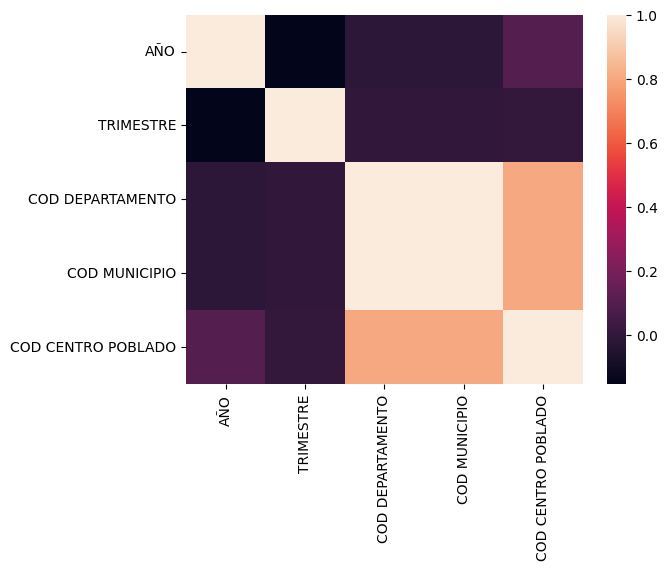

In [74]:
# diagrama de correlación
sns.heatmap(df_movile_red.corr(numeric_only=True))

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


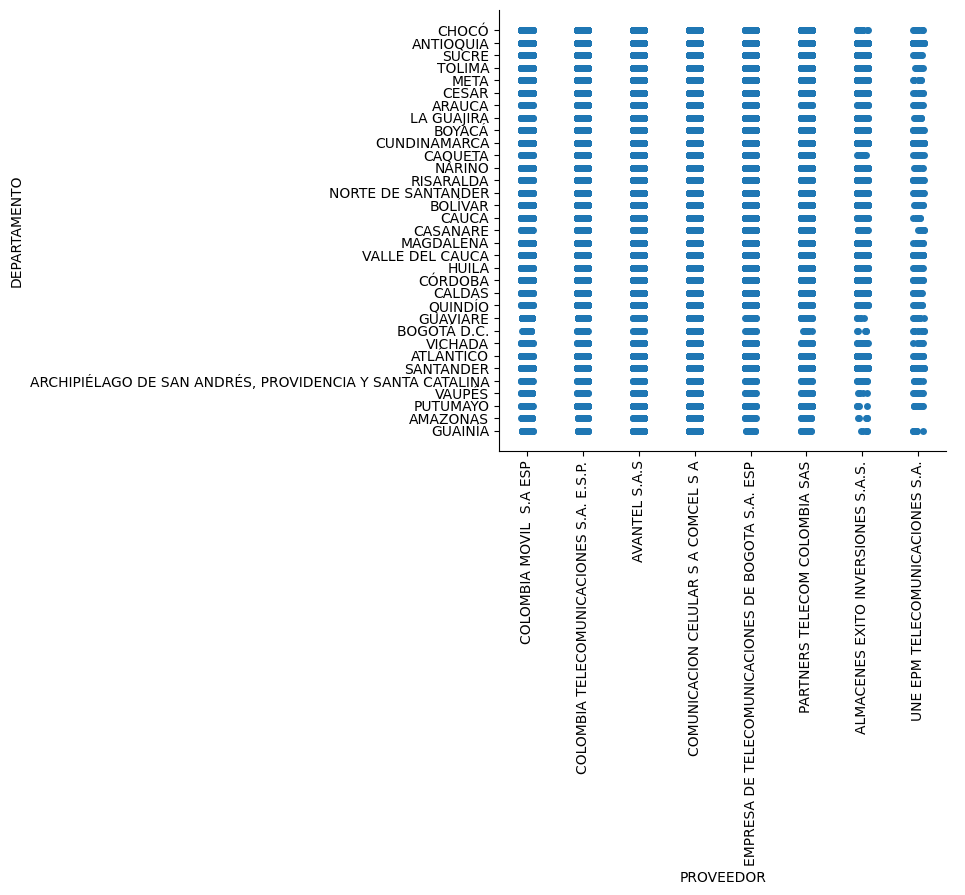

In [75]:
# cobertura por departamento
sns.catplot(data=df_movile_red, y='DEPARTAMENTO', x='PROVEEDOR')
plt.xticks(rotation=90)## rotamos el ejej x 90 grados
plt.show()

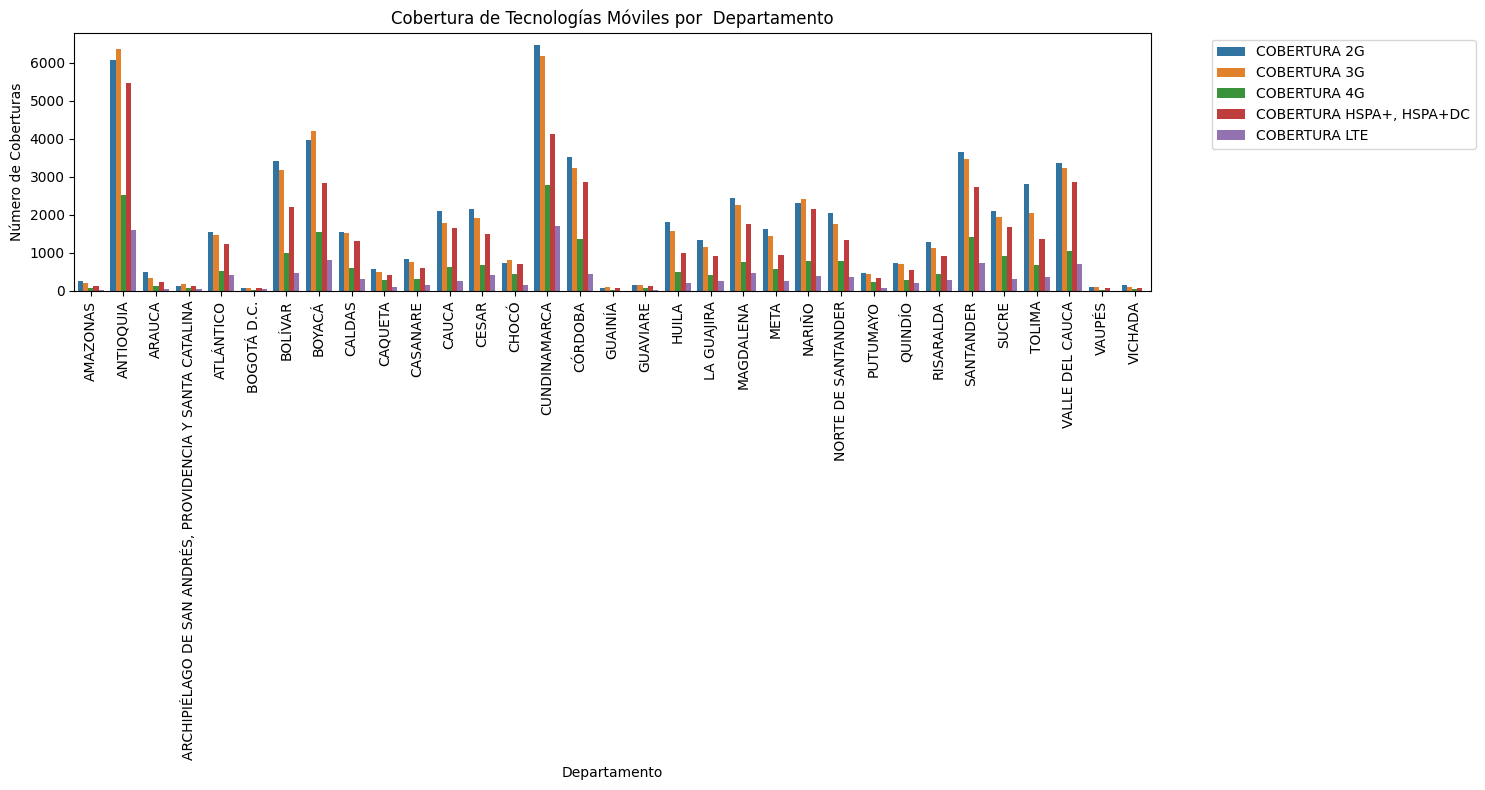

In [76]:
# Fundir el DataFrame a formato largo para facilitar el trazado
df_melted = df_movile_red_copia.melt ( id_vars= [ 'DEPARTAMENTO' ],
                                    value_vars= [ 'COBERTURA 2G' , 'COBERTURA 3G' , 'COBERTURA HSPA+, HSPA+DC' , 'COBERTURA 4G' , 'COBERTURA LTE' , 'COBERTURA 5G' ],
                                    var_name= 'Tecnologia' ,
                                    value_name= 'Cobertura' )

# Filtrar por cobertura igual a s (si cobertura)
df_covered = df_melted [ df_melted [ 'Cobertura' ]  ==  'S' ]

# Agrupar por Departamento y Tecnología y contar las  ocurrencias
df_grouped = df_covered.groupby ([ 'DEPARTAMENTO' , 'Tecnologia' ]) .size () .reset_index ( name= 'Count' )

# Crear el gráfico de barras agrupadas
plt.figure ( figsize= ( 15 , 8 ))
sns.barplot ( data=df_grouped ,  x= 'DEPARTAMENTO' ,  y= 'Count' ,  hue= 'Tecnologia' )
plt.xticks ( rotation= 90 )
plt.title ( 'Cobertura de Tecnologías Móviles por  Departamento' )
plt.xlabel ( 'Departamento' )
plt.ylabel ( 'Número de Coberturas' )
plt.legend ( bbox_to_anchor= ( 1.05 , 1 ),  loc= 'upper left' ) # Mover leyenda fuera de la trama
plt.tight_layout ()
plt.show ()

In [77]:
df_melted.head()

,DEPARTAMENTO,Tecnologia,Cobertura
0,CHOCÓ,COBERTURA 2G,N
1,ANTIOQUIA,COBERTURA 2G,S
2,SUCRE,COBERTURA 2G,N
3,TOLIMA,COBERTURA 2G,S
4,META,COBERTURA 2G,S


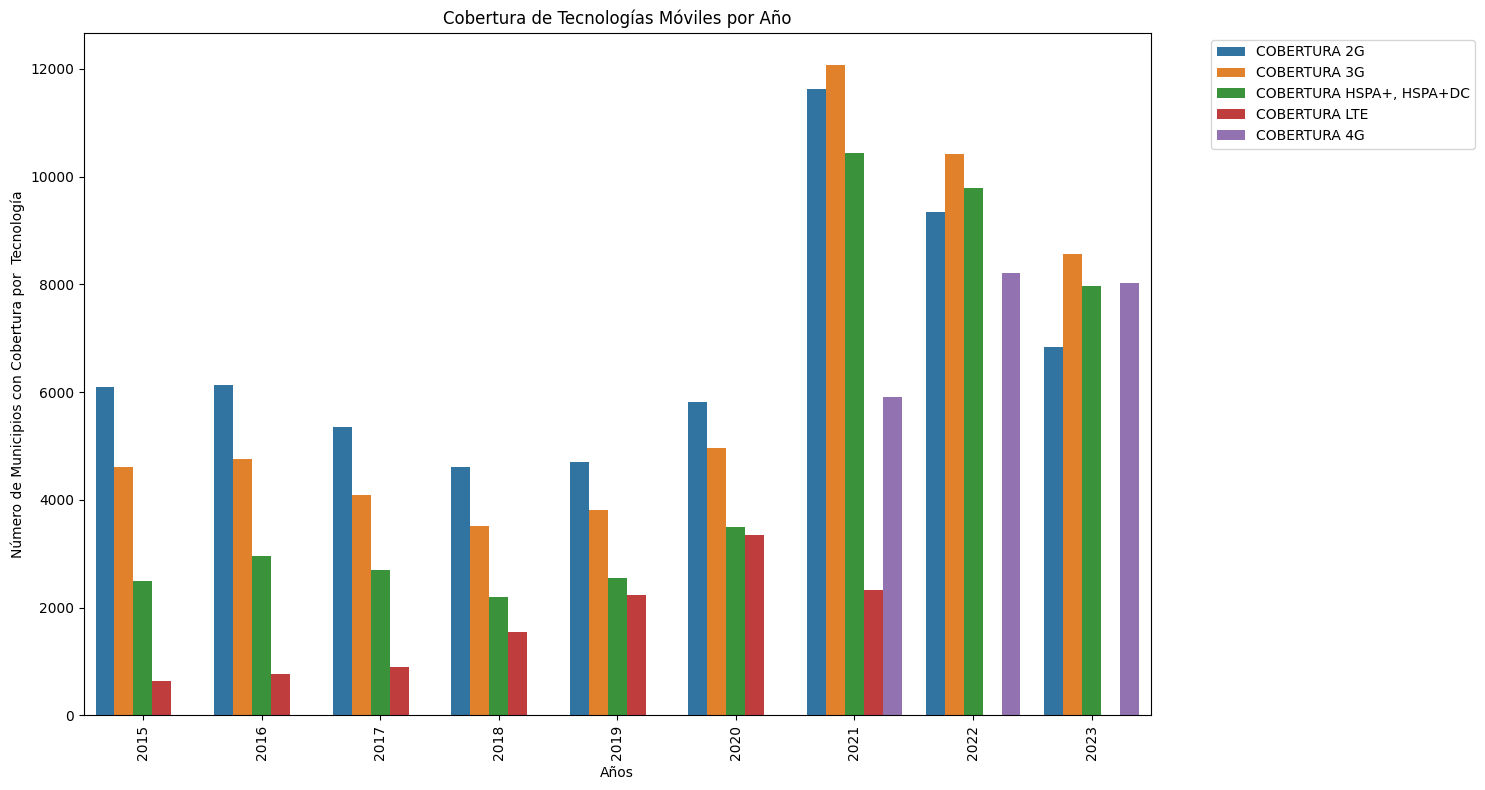

In [79]:
# Fusionar el DataFrame a formato largo para facilitar la representación gráfica
df_melted = df_movile_red_copia.melt ( id_vars= [ 'AÑO' ],
                                      value_vars= [ 'COBERTURA 2G' , 'COBERTURA 3G' , 'COBERTURA HSPA+, HSPA+DC' , 'COBERTURA 4G' , 'COBERTURA LTE' , 'COBERTURA 5G' ],
                                      var_name= 'Tecnologia' ,
                                      value_name= 'Cobertura' )

# Filtrar por cobertura igual a s (si cobertura)
df_covered = df_melted [ df_melted [ 'Cobertura' ]  ==  'S' ]

# Agrupar por Departamento y Tecnología y contar las  ocurrencias
df_grouped = df_covered.groupby ([ 'AÑO' , 'Tecnologia' ]) .size () .reset_index ( name= 'Count' )

plt.figure ( figsize= ( 15 , 8 ))
sns.barplot ( data=df_grouped ,  x= 'AÑO' ,  y= 'Count' ,  hue= 'Tecnologia' )
plt.xticks ( rotation= 90 )
plt.title ( 'Cobertura de Tecnologías Móviles por Año' )
plt.xlabel ( 'Años' )
plt.ylabel ( 'Número de Municipios con Cobertura por  Tecnología' )
plt.legend ( bbox_to_anchor= ( 1.05 , 1 ),  loc= 'upper left' ) # Mover leyenda por fuera de la gráfica
plt.tight_layout ()
plt.show ()